# Microbusiness Density Forecasting
--------
Hayden Outlaw - Math/CS @ Tulane University, New Orleans
Spring 2023

[GITHUB](https://github.com/outlawhayden) | [EMAIL](haydenkoutlaw@gmail.com) | [LINKEDIN](https://linkedin.com/in/hayden-outlaw)

## Introduction

### Competition Source

- This competition was published on Kaggle by GoDaddy, and submissions by other teams as well as more in-depth information about the sponsorship of this project can be found [here](https://www.kaggle.com/competitions/godaddy-microbusiness-density-forecasting/overview)

### Competition Goal

The goal of this competition is to predict monthly microbusiness density in a given area. You will develop an accurate model trained on U.S. county-level data.

Your work will help policymakers gain visibility into microbusinesses, a growing trend of very small entities. Additional information will enable new policies and programs to improve the success and impact of these smallest of businesses.

### Context

American policy leaders strive to develop economies that are more inclusive and resilient to downturns. They're also aware that with advances in technology, entrepreneurship has never been more accessible than it is today. Whether to create a more appropriate work/life balance, to follow a passion, or due to loss of employment, studies have demonstrated that Americans increasingly choose to create businesses of their own to meet their financial goals. The challenge is that these "microbusinesses" are often too small or too new to show up in traditional economic data sources, making it nearly impossible for policymakers to study them. But data science could help fill in the gaps and provide insights into the factors associated these businesses.

Over the past few years the Venture Forward team at GoDaddy has worked hard to produce data assets about the tens of millions of microbusinesses in the United States. Microbusinesses are generally defined as businesses with an online presence and ten or fewer employees. GoDaddy has visibility into more than 20 million of them, owned by more than 10 million entrepreneurs. We've surveyed this universe of microbusiness owners for several years and have collected a great deal of information on them that you can access via our survey data here.

Current models leverage available internal and census data, use econometric approaches, and focus on understanding primary determinants. While these methods are adequate, there's potential to include additional data and using more advanced approaches to improve predictions and to better inform decision-making.

Competition host GoDaddy is the world’s largest services platform for entrepreneurs around the globe. They're on a mission to empower their worldwide community of 20+ million customers—and entrepreneurs everywhere—by giving them all the help and tools they need to grow online.

Your work will help better inform policymakers as they strive to make the world a better place for microbusiness entrepreneurs. This will have a real and substantial impact on communities across the country and will help our broader economy adapt to a constantly evolving world.

## Data Sources
-------
The data must first be read into Pandas Dataframe objects, so that they can be manipulated and investigated.


### Data From Kaggle:
------
**train.csv**

    row_id - An ID code for the row.
    cfips - A unique identifier for each county using the Federal Information Processing System. The first two digits correspond to the state FIPS code, while the following 3 represent the county.
    county_name - The written name of the county.
    state_name - The name of the state.
    first_day_of_month - The date of the first day of the month.
    microbusiness_density - Microbusinesses per 100 people over the age of 18 in the given county. This is the target variable. The population figures used to calculate the density are on a two-year lag due to the pace of update provided by the U.S. Census Bureau, which provides the underlying population data annually. 2021 density figures are calculated using 2019 population figures, etc.
    active - The raw count of microbusinesses in the county. Not provided for the test set.

**sample_submission.csv** A valid sample submission. This file will remain unchanged throughout the competition.

    row_id - An ID code for the row.
    microbusiness_density - The target variable.

**test.csv** Metadata for the submission rows. This file will remain unchanged throughout the competition.

    row_id - An ID code for the row.
    cfips - A unique identifier for each county using the Federal Information Processing System. The first two digits correspond to the state FIPS code, while the following 3 represent the county.
    first_day_of_month - The date of the first day of the month.

**revealed_test.csv** During the submission period, only the most recent month of data will be used for the public leaderboard. Any test set data older than that will be published in revealed_test.csv, closely following the usual data release cycle for the microbusiness report. We expect to publish one copy of revealed_test.csv in mid February. This file's schema will match train.csv.

**census_starter.csv** Examples of useful columns from the Census Bureau's American Community Survey (ACS) at data.census.gov. The percentage fields were derived from the raw counts provided by the ACS. All fields have a two year lag to match what information was avaiable at the time a given microbusiness data update was published.

    pct_bb_[year] - The percentage of households in the county with access to broadband of any type. Derived from ACS table B28002: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD.
    cfips - The CFIPS code.
    pct_college_[year] - The percent of the population in the county over age 25 with a 4-year college degree. Derived from ACS table S1501: EDUCATIONAL ATTAINMENT.
    pct_foreign_born_[year] - The percent of the population in the county born outside of the United States. Derived from ACS table DP02: SELECTED SOCIAL CHARACTERISTICS IN THE UNITED STATES.
    pct_it_workers_[year] - The percent of the workforce in the county employed in information related industries. Derived from ACS table S2405: INDUSTRY BY OCCUPATION FOR THE CIVILIAN EMPLOYED POPULATION 16 YEARS AND OVER.
    median_hh_inc_[year] - The median household income in the county. Derived from ACS table S1901: INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS).




### Importing Libraries

In [40]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sk
import xgboost as xgb

sns.set_style('darkgrid')

### Reading in Data
------
Reading in data to dataframes from local files.

In [41]:
# Get current working directory
print(os.getcwd())

/Users/haydenoutlaw/Documents/Projects/kaggle/microbusiness


In [42]:
# Read in data into pandas dataframes
test_csv = pd.read_csv('./data_/test.csv')
train_csv = pd.read_csv('./data_/train.csv')
census_starter_csv = pd.read_csv('./data_/census_starter.csv')
sample_subission_csv = pd.read_csv('./data_/sample_submission.csv')

In [43]:
train_csv.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [44]:
test_csv.head()

,row_id,cfips,first_day_of_month
0,1001_2022-11-01,1001,2022-11-01
1,1003_2022-11-01,1003,2022-11-01
2,1005_2022-11-01,1005,2022-11-01
3,1007_2022-11-01,1007,2022-11-01
4,1009_2022-11-01,1009,2022-11-01


### Data Cleaning
-------
Examining the data types, resetting indices, and examining for missing data. The data is already processed by Kaggle, so there are no missing data entries, and all data is stored as the appropriate datatype.

In [45]:
# Assign primary keys to table indices
train_csv.set_index("row_id", inplace = True)
test_csv.set_index("row_id", inplace = True)

In [46]:
train_csv.dtypes

cfips                      int64
county                    object
state                     object
first_day_of_month        object
microbusiness_density    float64
active                     int64
dtype: object

In [47]:
test_csv.dtypes

cfips                  int64
first_day_of_month    object
dtype: object

The dates are stored as objects, and will be converted to pandas datetime objects for time-series analysis. More information on datetime objects is available in documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html).

In [65]:
train_csv["first_day_of_month"] = pd.to_datetime(train_csv["first_day_of_month"].values)
test_csv["first_day_of_month"] = pd.to_datetime(test_csv["first_day_of_month"].values)

In [66]:
train_csv.isna().sum()

cfips                    0
county                   0
state                    0
first_day_of_month       0
microbusiness_density    0
active                   0
dtype: int64

In [67]:
test_csv.isna().sum()

cfips                 0
first_day_of_month    0
dtype: int64

The data is entirely filled, and contains no missing values to handle in any column

## Εxploratory Data Analysis

Text(0.5, 1.01, 'Fig 1. Microbusiness Density, and Raw Microbusiness Counts Marginal Distributions')

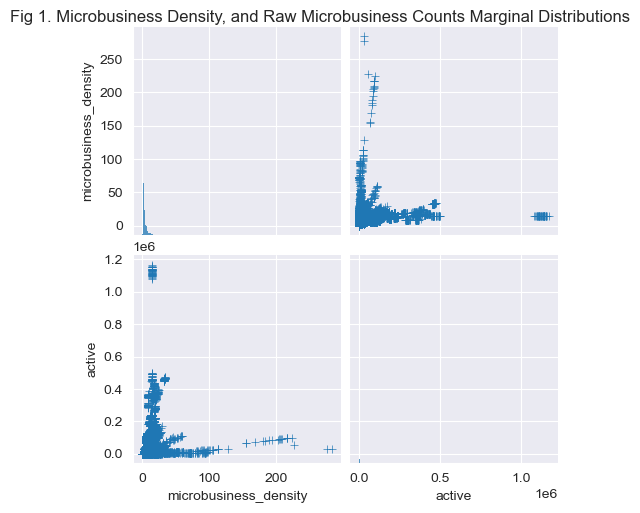

In [68]:
# Create a few joint marginal distributions using seaborn's pairplot
train_pairplot = sns.pairplot(train_csv[["microbusiness_density","active"]], markers="+")
train_pairplot.fig.suptitle("Fig 1. Microbusiness Density, and Raw Microbusiness Counts Marginal Distributions", y = 1.01)

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Average Microbusiness Density')]

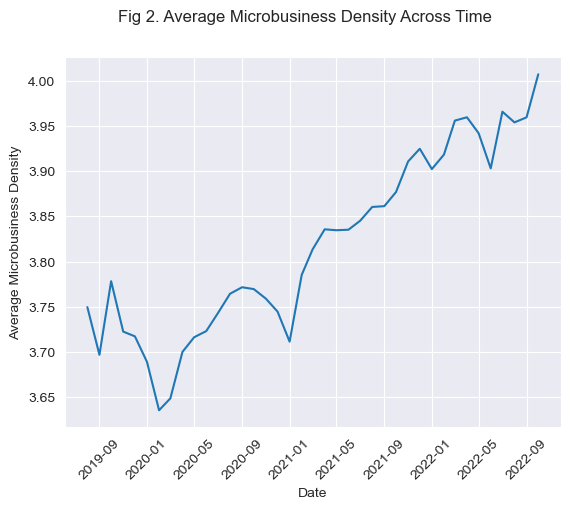

In [69]:
# Get average density per month
by_date_avg = train_csv.groupby("first_day_of_month").mean(numeric_only = True)

# Plot data
avg_mbd_time = sns.lineplot(data = by_date_avg, x = "first_day_of_month", y = "microbusiness_density")
plt.xticks(rotation=45)
plt.suptitle("Fig 2. Average Microbusiness Density Across Time")
avg_mbd_time.set(xlabel = "Date", ylabel = "Average Microbusiness Density")


## Modeling
-------
The goal is to take in the known data, and predict microbusiness density in future settings. To do this, the data will be preprocessed, split into training and testing sests, and then plugged into various models to find the best possible regression system.

Model Options:
- [Elastic Net Regression:](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) A regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods
- [Stochastic Gradient Descent:](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) A stochastic approximation of gradient descent optimization
- [Kernel Ridge Regression:](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html) A non-parametric technique to estimate the conditional expectation of a random variable
- [Extreme Gradient Boosted Forest Regression:](https://xgboost.readthedocs.io/en/stable/): A boosted non-parametric decision forest used for regression prediction

### Preprocessing

In [81]:
# Convert datetimes into ordinal days for modeling
train_csv["days_since_beginning"] = train_csv["first_day_of_month"].apply(lambda x: x.toordinal())
test_csv["days_since_beginning"] = test_csv["first_day_of_month"].apply(lambda x: x.toordinal())

In [82]:
# Split into training and testing
from sklearn.model_selection import train_test_split

X = train_csv[["cfips", "county", "state", "days_since_beginning", "active"]]
X = pd.get_dummies(X, columns = ["county", "state"])
y = train_csv["microbusiness_density"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 22)

In [83]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X_train, y_train)

array([[-0.80519408, -0.62430902, -0.1660173 , ..., -0.1329599 ,
        -0.15388628, -0.08668806],
       [-1.60512765,  1.50972116, -0.12509253, ..., -0.1329599 ,
        -0.15388628, -0.08668806],
       [ 0.77672668, -0.44598595, -0.17735537, ..., -0.1329599 ,
        -0.15388628, -0.08668806],
       ...,
       [ 1.10108114, -0.26766288, -0.1802572 , ..., -0.1329599 ,
        -0.15388628, -0.08668806],
       [ 1.63524991,  0.53332927, -0.17843234, ..., -0.1329599 ,
         6.49830504, -0.08668806],
       [ 1.29783154,  1.33139809,  0.23646945, ..., -0.1329599 ,
        -0.15388628, -0.08668806]])

### Model Selection
-----
Various models will be tried, and ranked on their ability to predict future unseen data. From this ranking, the best one will be selected, and then tuned. 

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
# ElasticNet
from sklearn.linear_model import ElasticNet

elastic_parameters = {'sample_weight': ('None')}

In [87]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor

sgd_parameters = {
'loss': ('squared_error'),
'penalty':["elasticnet"],
'shuffle': ["True"],
'random_state': [0],
'learning_rate': ["adaptive", "invscaling"],
'early_stopping':[False, True],
'max_iter' : [1000, 3000, 5000, 10000, 200000]
}

In [89]:
# KernelRidge Regression
from sklearn.kernel_ridge import KernelRidge

kr_parameters = {
'alpha' : [0.01, 0.1, 0.5, 1.0, 2.0, 10.0],
'degree' :[3,4,5,6,7,8,9,10],
}

In [88]:
# XGB Forest Regression
from xgboost.sklearn import XGBRegressor

xgb_parameters = {
'booster': ["gbtree","gblinear","dart"],
'eta': [0.1,0.2,0.3,0.4,0.5],
"gamma":[0, 0.001, 0.01, 0.05, 0.1, 0.5],
"max_depth":[2,3,4,5,6,7,8],
'subsample':[0.2,0.4,0.5,0.7,1],
'lambda':[1,1.5,2,2.5,3],
'alpha':[0,0.001,0.005,0.01, 0.05, 0.1]
}